## Mini Projet

# Analyse des ventes d’une boutique en ligne

Nettoyer les données

Calculer les ventes par mois

Trouver les produits les plus vendus

Fusionner les données clients + commandes

Analyser les tendances par sexe

Et le tout avec NaN, groupby(), merge(), apply(), etc.

# Creer nos dataframe

clients.csv et commandes.csv

In [34]:
import pandas as pd
from io import StringIO

# Données client (en format CSV texte)
data_client = """client_id,nom,sexe
1,Jean,M
2,Awa,F
3,Koffi,M
4,Mariame,F
"""

# Données commande
data_commande = """commande_id,client_id,date,produit,quantite,prix
101,1,2024-01-15,Chaussures,2,15000
102,2,2024-02-20,T-shirt,1,5000
103,3,2024-02-22,Chaussures,1,15000
104,4,2024-03-01,Veste,,20000
105,2,2024-03-15,Chaussures,3,15000
"""

# Conversion en DataFrame
df_client = pd.read_csv(StringIO(data_client))
df_commande = pd.read_csv(StringIO(data_commande))

df_client.to_csv('client.csv', index=True)
df_commande.to_csv('commande.csv', index=True)


## Nettoyage

In [35]:
print(df_client.head())
print()
print(df_client.info())



   client_id      nom sexe
0          1     Jean    M
1          2      Awa    F
2          3    Koffi    M
3          4  Mariame    F

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  4 non-null      int64 
 1   nom        4 non-null      object
 2   sexe       4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes
None


In [36]:
print(df_commande)
print()
print(df_commande.info())
print()
print(df_commande.isna().sum())

   commande_id  client_id        date     produit  quantite   prix
0          101          1  2024-01-15  Chaussures       2.0  15000
1          102          2  2024-02-20     T-shirt       1.0   5000
2          103          3  2024-02-22  Chaussures       1.0  15000
3          104          4  2024-03-01       Veste       NaN  20000
4          105          2  2024-03-15  Chaussures       3.0  15000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   commande_id  5 non-null      int64  
 1   client_id    5 non-null      int64  
 2   date         5 non-null      object 
 3   produit      5 non-null      object 
 4   quantite     4 non-null      float64
 5   prix         5 non-null      int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 372.0+ bytes
None

commande_id    0
client_id      0
date           0
produit        0
quantite       1
pri

## Nettoyage du csv commande.csv

In [50]:
df_commande = df_commande.fillna(0)
print(df_commande.isna().sum())
df_commande

commande_id    0
client_id      0
date           0
produit        0
quantite       0
prix           0
dtype: int64


,commande_id,client_id,date,produit,quantite,prix
0,101,1,2024-01-15,Chaussures,2.0,15000
1,102,2,2024-02-20,T-shirt,1.0,5000
2,103,3,2024-02-22,Chaussures,1.0,15000
3,104,4,2024-03-01,Veste,0.0,20000
4,105,2,2024-03-15,Chaussures,3.0,15000


## Calculer le montant de chaque commande

In [42]:
print(f"colonnes des commande: {df_commande.columns}")
print(f"colonnes des clients: {df_client.columns}")

colonnes des commande: Index(['commande_id', 'client_id', 'date', 'produit', 'quantite', 'prix'], dtype='object')
colonnes des clients: Index(['client_id', 'nom', 'sexe'], dtype='object')


In [52]:
df_commande['montant_total'] = df_commande['quantite']*df_commande['prix']
df_commande

,commande_id,client_id,date,produit,quantite,prix,montant_total
0,101,1,2024-01-15,Chaussures,2.0,15000,30000.0
1,102,2,2024-02-20,T-shirt,1.0,5000,5000.0
2,103,3,2024-02-22,Chaussures,1.0,15000,15000.0
3,104,4,2024-03-01,Veste,0.0,20000,0.0
4,105,2,2024-03-15,Chaussures,3.0,15000,45000.0


## convertir la date au format Anne-Mois-Jours

In [54]:
df_commande['date'] = pd.to_datetime(df_commande['date'], format='%Y-%m-%d')
df_commande

,commande_id,client_id,date,produit,quantite,prix,montant_total
0,101,1,2024-01-15,Chaussures,2.0,15000,30000.0
1,102,2,2024-02-20,T-shirt,1.0,5000,5000.0
2,103,3,2024-02-22,Chaussures,1.0,15000,15000.0
3,104,4,2024-03-01,Veste,0.0,20000,0.0
4,105,2,2024-03-15,Chaussures,3.0,15000,45000.0


## Fusionner les données clients+commande

In [56]:
df = pd.merge(df_client, df_commande, on='client_id')
df

,client_id,nom,sexe,commande_id,date,produit,quantite,prix,montant_total
0,1,Jean,M,101,2024-01-15,Chaussures,2.0,15000,30000.0
1,2,Awa,F,102,2024-02-20,T-shirt,1.0,5000,5000.0
2,2,Awa,F,105,2024-03-15,Chaussures,3.0,15000,45000.0
3,3,Koffi,M,103,2024-02-22,Chaussures,1.0,15000,15000.0
4,4,Mariame,F,104,2024-03-01,Veste,0.0,20000,0.0


## analyse des tendances par sexe

In [ ]:
df['sexe'].value_counts()

sexe
F    3
M    2
Name: count, dtype: int64

In [63]:
print(f"{df['sexe'].value_counts(normalize=True)*100} %")

sexe
F    60.0
M    40.0
Name: proportion, dtype: float64 %


<Axes: title={'center': 'Répartition des clients par sexe'}, xlabel='sexe'>

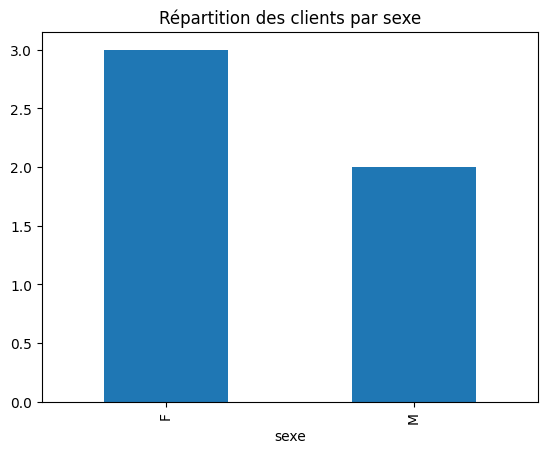

In [67]:
df['sexe'].value_counts().plot(kind = 'bar', title='Répartition des clients par sexe')

<Axes: >

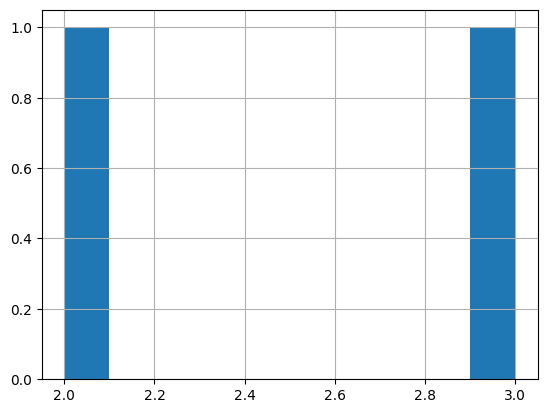

In [70]:
df["sexe"].value_counts().hist()